<a href="https://colab.research.google.com/github/TArdelean/DynamicConvolution/blob/master/notebooks/DyConv_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Koopman AE

## Set-up drive for saving the experiments

In [32]:
from google.colab import drive
drive.mount('/content/drive')

root_dir = '/content/drive/MyDrive/koopman'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Clone the repo

In [33]:
!git clone https://github.com/adasegroup/koopman_forecasting.git $root_dir

In [31]:
!pip install pytorch_lightning

     |████████████████████████████████| 808kB 7.7MB/s 
     |████████████████████████████████| 112kB 15.0MB/s 
     |████████████████████████████████| 645kB 16.0MB/s 
     |████████████████████████████████| 829kB 33.9MB/s 
     |████████████████████████████████| 276kB 41.0MB/s 
     |████████████████████████████████| 1.3MB 43.5MB/s 
     |████████████████████████████████| 296kB 37.4MB/s 
     |████████████████████████████████| 143kB 44.6MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=0a495a0aa23e1b9b5683e7e2a8d62cabc1391223c60a9e8a5ab46b857466348f
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


#Consistent Koopman Autoencoders

In [34]:
!python /content/drive/MyDrive/koopman/koopmanAE/driver.py --dataset pendulum --folder results_back_pendulum --bottleneck 6 --backward 1

Using the CPU
torch.Size([600, 1, 64, 1])
koopmanAE
**** Setup ****
Total params: 0.00M
Total params: 2.96k
************
koopmanAE(
  (encoder): encoderNet(
    (tanh): Tanh()
    (fc1): Linear(in_features=64, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=6, bias=True)
  )
  (dynamics): dynamics(
    (dynamics): Linear(in_features=6, out_features=6, bias=False)
  )
  (backdynamics): dynamics_back(
    (dynamics): Linear(in_features=6, out_features=6, bias=False)
  )
  (decoder): decoderNet(
    (tanh): Tanh()
    (fc1): Linear(in_features=6, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=64, bias=True)
  )
)
Using the CPU
********** Epoche 1 **********
loss identity:  0.1873587816953659
loss backward:  0.6740797162055969
loss consistent:  5.721186637878418
loss forward:  0.3663664162158966
loss sum:  0.67834

In [35]:
!python /content/drive/MyDrive/koopman/koopmanAE/driver.py --dataset pendulum --folder results_pendulum --bottleneck 6 --backward 0

Using the CPU
torch.Size([600, 1, 64, 1])
koopmanAE
**** Setup ****
Total params: 0.00M
Total params: 2.96k
************
koopmanAE(
  (encoder): encoderNet(
    (tanh): Tanh()
    (fc1): Linear(in_features=64, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=6, bias=True)
  )
  (dynamics): dynamics(
    (dynamics): Linear(in_features=6, out_features=6, bias=False)
  )
  (backdynamics): dynamics_back(
    (dynamics): Linear(in_features=6, out_features=6, bias=False)
  )
  (decoder): decoderNet(
    (tanh): Tanh()
    (fc1): Linear(in_features=6, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=64, bias=True)
  )
)
Using the CPU
********** Epoche 1 **********
loss identity:  0.19445382058620453
loss forward:  0.3636185824871063
loss sum:  0.5580723881721497
[1.0441797  0.83684546 0.8333732  0.8333732  0.8692836  0.

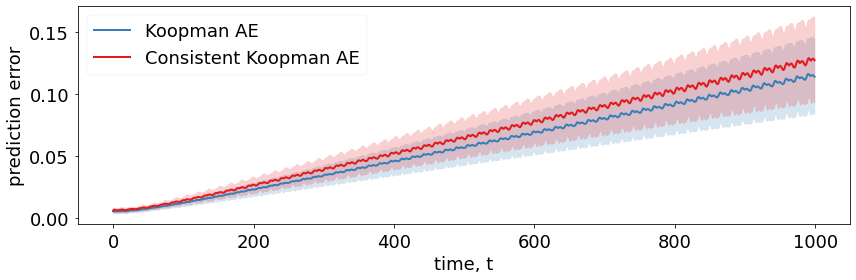

In [36]:
%run '/content/drive/MyDrive/koopman/koopmanAE/plot_pred_error.py'

Using the CPU
torch.Size([600, 1, 64, 1])
koopmanAE
**** Setup ****
Total params: 0.00M
Total params: 2.81k
************
koopmanAE(
  (encoder): encoderNet(
    (tanh): Tanh()
    (fc1): Linear(in_features=64, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=3, bias=True)
  )
  (dynamics): dynamics(
    (dynamics): Linear(in_features=3, out_features=3, bias=False)
  )
  (backdynamics): dynamics_back(
    (dynamics): Linear(in_features=3, out_features=3, bias=False)
  )
  (decoder): decoderNet(
    (tanh): Tanh()
    (fc1): Linear(in_features=3, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=64, bias=True)
  )
)
Using the CPU
********** Epoche 1 **********
loss identity:  0.17564064264297485
loss forward:  0.3028530478477478
loss sum:  0.47849369049072266
[0.91378427 0.9197765  0.9197765 ]
********** Epoche 21 *

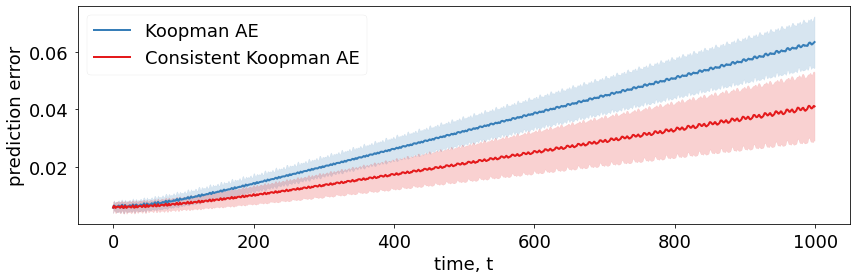

In [37]:
!python /content/drive/MyDrive/koopman/koopmanAE/driver.py --dataset pendulum --folder results_pendulum --bottleneck 3 --backward 0
!python /content/drive/MyDrive/koopman/koopmanAE/driver.py --dataset pendulum --folder results_back_pendulum --bottleneck 3 --backward 1
%run '/content/drive/MyDrive/koopman/koopmanAE/plot_pred_error.py'